In [1]:
papers = {
    'Madison': [10, 14, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
    'Hamilton': [1, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 21, 22, 23, 24,
                 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 59, 60,
                 61, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
                 78, 79, 80, 81, 82, 83, 84, 85],
    'Jay': [2, 3, 4, 5, 64],
    'Shared': [18, 19, 20],
    'Disputed': [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63],
}

In [2]:
# compiling all of the text files associated with a single author into a single string

def read_files_into_string(filenames):
    strings = []
    for filename in filenames:
        with open(f'data/federalist_{filename}.txt') as f:
            strings.append(f.read())
        return '\n'.join(strings)

In [3]:
# making a dictionary out of the author's corpora

federalist_by_author = {}

for author, files in papers.items():
    federalist_by_author[author] = read_files_into_string(files)

MENDENHALL'S CHARACTERISTIC CURVES OF COMPOSITION

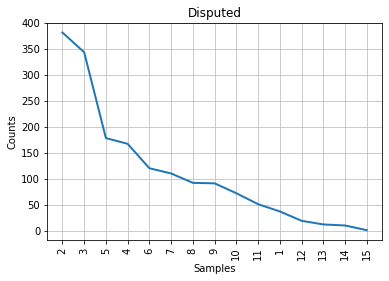

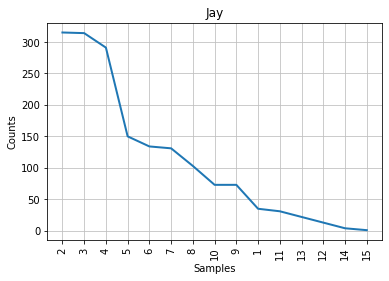

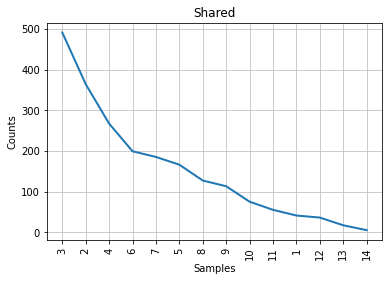

In [4]:
import nltk

%matplotlib inline

# comparing the disputed papers to those written by everyone
# including the shared ones

authors = ('Hamilton', 'Madison', 'Disputed', 'Jay', 'Shared')


# transform the authors' corpora into list of word tokens
federalist_by_author_tokens = {}
federalist_by_author_length_distributions = {}

for author in authors:
    tokens = nltk.word_tokenize(federalist_by_author[author])
    
    # filter out punctuations
    federalist_by_author_tokens[author] = ([token for token in tokens
                                           if any(c.isalnum() for c in token)])
    
    # get a distribution of token lengths
    token_lengths = [len(token) for token in federalist_by_author_tokens[author]]
    federalist_by_author_length_distributions[author] = nltk.FreqDist(token_lengths)
    federalist_by_author_length_distributions[author].plot(15, title=author)

KILGARIFF'S CHI-SQUARED METHOD

In [5]:
# Code Copied from the reference article

# Who are the authors we are analyzing?
authors = ("Hamilton", "Madison")

# Lowercase the tokens so that the same word, capitalized or not,
# counts as one word
for author in authors:
    federalist_by_author_tokens[author] = ([token.lower() 
                                            for token in federalist_by_author_tokens[author]])
federalist_by_author_tokens["Disputed"] = ([token.lower() 
                                            for token in federalist_by_author_tokens["Disputed"]])

# Calculate chisquared for each of the two candidate authors
for author in authors:

    # First, build a joint corpus and identify the 500 most frequent words in it
    joint_corpus = (federalist_by_author_tokens[author] +
                    federalist_by_author_tokens["Disputed"])
    joint_freq_dist = nltk.FreqDist(joint_corpus)
    most_common = list(joint_freq_dist.most_common(500))

    # What proportion of the joint corpus is made up
    # of the candidate author's tokens?
    author_share = (len(federalist_by_author_tokens[author])
                    / len(joint_corpus))

    # Now, let's look at the 500 most common words in the candidate
    # author's corpus and compare the number of times they can be observed
    # to what would be expected if the author's papers
    # and the Disputed papers were both random samples from the same distribution.
    chisquared = 0
    for word,joint_count in most_common:

        # How often do we really see this common word?
        author_count = federalist_by_author_tokens[author].count(word)
        disputed_count = federalist_by_author_tokens["Disputed"].count(word)

        # How often should we see it?
        expected_author_count = joint_count * author_share
        expected_disputed_count = joint_count * (1-author_share)

        # Add the word's contribution to the chi-squared statistic
        chisquared += ((author_count-expected_author_count) *
                       (author_count-expected_author_count)/
                       expected_author_count)

        chisquared += ((disputed_count-expected_disputed_count) *
                       (disputed_count-expected_disputed_count)
                       / expected_disputed_count)

    print("The Chi-squared statistic for candidate", author, "is", chisquared)


The Chi-squared statistic for candidate Hamilton is 722.5322037380886
The Chi-squared statistic for candidate Madison is 813.1345131815777


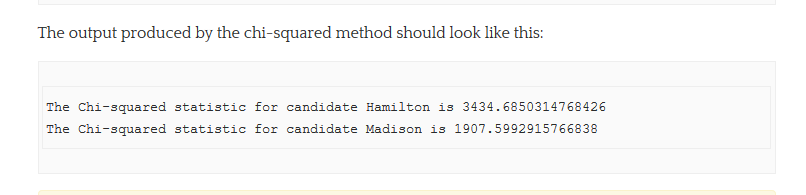

Even though the code is directly copied, the results do not match.

In the sense that the chi-squared statistic for Madison should be lesser than for Hamilton.
The same has been supported by all tests done on the Federalist papers.

Thus, there exists an error in the referred article.

In [6]:
# Our approach at resolving the error

authors = ("Hamilton", "Madison")

# lower casing all the tokens (i.e. words)
# so that no words are repeated due to case-differences

for author in authors:
    federalist_by_author_tokens[author] = ([token.lower()
                                           for token in federalist_by_author_tokens[author]])
federalist_by_author_tokens["Disputed"] = ([token.lower()
                                           for token in federalist_by_author_tokens["Disputed"]])

In [7]:
# creating the joint corpus for both Madison and Hamilton
# for having the expected value parameter

for author in authors:
    joint_corpus = (federalist_by_author_tokens[author] +
                   federalist_by_author_tokens["Disputed"])
    joint_freq_dist = nltk.FreqDist(joint_corpus)
    most_common = list(joint_freq_dist.most_common(500))
    
    # getting the proportion of author share
    # in the joint corpus so formed
    author_share = (len(federalist_by_author_tokens[author]) /
                   len(joint_corpus))

In [8]:
# getting started with the chi-squared calculations
for author in authors:
    chisquared = 0

    for word, joint_count in most_common:
        author_count = federalist_by_author_tokens[author].count(word)
    
        expected_author_count = joint_count * author_share
    
        chisquared += (((author_count - expected_author_count) *
                      (author_count - expected_author_count)) /
                      expected_author_count)
    
    print("The Chi-squared statistic for candidate", author, "is", chisquared)

The Chi-squared statistic for candidate Hamilton is 1233.6155713504918
The Chi-squared statistic for candidate Madison is 290.35592031335887


JOHN BURROW'S DELTA METHOD

In [9]:
# Illinois Institute of Technology, Chicago (Method/Approach Idea)

# set of authors that we'll include in the joint corpus
authors = ("Hamilton", "Madison", "Jay")

for author in authors:
    federalist_by_author_tokens[author] = [word.lower()
                                          for word in federalist_by_author_tokens[author]]

whole_corpus = []

for author in authors:
    whole_corpus += federalist_by_author_tokens[author]

In [10]:
# getting a frequency distribution of 30 most frequent words

whole_corpus_freq_dist = list(nltk.FreqDist(whole_corpus).most_common(30))

In [11]:
# getting per feature ratio to the total number of words
# for whole_corpus

features = [word for word, freq in whole_corpus_freq_dist]

feature_freqs = {}

for author in authors:
    feature_freqs[author] = {}
    
    total_words = len(federalist_by_author_tokens[author])
    
    for feature in features:
        feature_count = federalist_by_author_tokens[author].count(feature)
        
        feature_freqs[author][feature] = feature_count / total_words

In [12]:
# getting per feature ratio to the total number of words
# for testcase
federalist_by_author_tokens["Disputed"] = nltk.word_tokenize(federalist_by_author["Disputed"])

federalist_by_author_tokens["Disputed"] = [token.lower()
                                          for token in federalist_by_author_tokens["Disputed"]
                                          if any(c.isalnum() for c in token)]

testcase_freqs = {}

for feature in features:
    feature_count = federalist_by_author_tokens["Disputed"].count(feature)
    
    testcase_freqs[feature] = feature_count / len(federalist_by_author_tokens["Disputed"])

In [13]:
# numerator preperation for the delta score

numerator = {}
for author in authors:
    numerator[author] = {}
    for feature in features:
        numerator[author][feature] = testcase_freqs[feature] - feature_freqs[author][feature]

In [14]:
import math
# standard deviation

# mean
corpus_features = {}

for feature in features:
    corpus_features[feature] = {}
    
    feature_avg = 0
    for author in authors:
        feature_avg += feature_freqs[author][feature]
    feature_avg /= len(authors)
    corpus_features[feature]["Mean"] = feature_avg
    
    feature_std = 0
    for author in authors:
        diff = feature_freqs[author][feature] - corpus_features[feature]["Mean"]
        feature_std += diff * diff
    feature_std /= (len(author) - 1)
    feature_std = math.sqrt(feature_std)
    corpus_features[feature]["Std"] = feature_std

In [15]:
# delta score

delta = {}

for author in authors:
    delta_score = 0
    for feature in features:
        delta_score += math.fabs(numerator[author][feature] / corpus_features[feature]["Std"])
    delta[author] = delta_score / len(features)

delta

{'Hamilton': 1.3372946710388083,
 'Madison': 1.1748827387927678,
 'Jay': 1.4370331143955142}